# Taking the atmosphere into account at sub(-mm) wavelength 

The atmosphere is not very transparent at mm wavelength, apart in certain windows. For a short primer on atmosphere and their modelling, please refer to IRAM Memo 2009-5 by Petit et al.  available here: http://www.iram-institute.org/EN/content-page-161-7-66-161-0-0.html

The photometry package allow to take into account an atmosphere on top of the system passbands. 

## Atmosphere


In [1]:
%matplotlib inline
import photometry as pt
from matplotlib import pyplot as plt
from matplotlib import gridspec
from astropy import units as u
from astropy.coordinates import Angle
from astropy.time import Time

In [2]:
atm = pt.IramAtmosphere()

In [3]:
print(atm)

Model:               2009
Observatory:         iram30m
Profile:             midlatwinter
File:                /Users/haussel/work/python/photometry/data/atmosphere/iram/atmosphere_2009_midlatwinter_iram30m.atm
Grid set:            False
Current temperature: None
Model temperature:   None
Current pressure:    None
Model pressure:      None
Tau set:             False
Tau 225 GHz:         None
mm H2O:              None
Ready to compute     False



We have read from the disk a grid of model atmosphere corresponding to a profile that should correspond to the conditions in winter at Pico Veleta. Other models are available: 
 * Model: 2009
     * Observatory: iram30m
         * Profile: midlatwinter
         * Profile: midlatsummer
     * Observatory: PdB
         * Profile: midlatsummer 
 * Model: 1985
     * Observatory: iram30m
     
Note that there are no different profiles for winter and summer with the 1985 model. 
Other model could be computed. 

For our model profile, a set of atmospheric transmissions have been computed for grid of temperatures and pressures. Let's print these quantities:

In [4]:
print(atm.temperatures)
print(atm.pressures)

[ 250.          256.1111145   262.222229    268.33334351  274.44445801
  280.55554199  286.66665649  292.777771    298.8888855   305.        ] K
[ 687.77746582  695.6328125   703.48815918  711.34344482  719.1987915 ] hPa


For each couple of (temperature, pressure), the model contains two curves: 
 * an opacity at zenith $\tau_{dry}$ corresponding to the opacity due to the permanent components of the atmosphere ($O_{2}, O_{3}$) 
 * an opacity at zenith $\tau_{wet}$  due to the amount of precipitable water vapour, and given for 1mm $H_2O$.
 Let's take a look at these components for the wet and dry part.

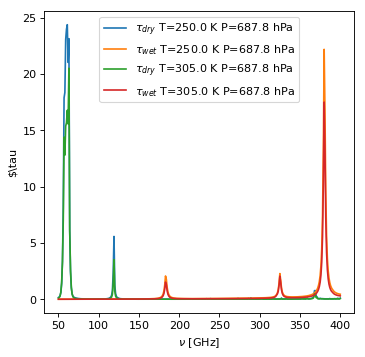

In [5]:
it = 0
ip = 0
fig1 = plt.figure(1, (5,5), 80)
plt.plot(atm.nu(u.GHz), atm.grid_tau_dry[:,it,ip], label=r'$\tau_{{dry}}$ T={} P={:.1f}'.format(atm.temperatures[it],atm.pressures[ip]))
plt.plot(atm.nu(u.GHz), atm.grid_tau_wet[:,it,ip], label=r'$\tau_{{wet}}$ T={} P={:.1f}'.format(atm.temperatures[it],atm.pressures[ip]))
it = 9
ip = 0
plt.plot(atm.nu(u.GHz), atm.grid_tau_dry[:,it,ip], label=r'$\tau_{{dry}}$ T={} P={:.1f}'.format(atm.temperatures[it],atm.pressures[ip]))
plt.plot(atm.nu(u.GHz), atm.grid_tau_wet[:,it,ip], label=r'$\tau_{{wet}}$ T={} P={:.1f}'.format(atm.temperatures[it],atm.pressures[ip]))
plt.legend(loc='upper center')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel(r'$\tau')


You can explore with the various position on the grid. 

Let's now select a model, using a temperature and a pressure:

In [6]:
atm.select_grid(temperature = 276 * u.K, pressure = 723 * u.hPa)
print(atm)

Model:               2009
Observatory:         iram30m
Profile:             midlatwinter
File:                /Users/haussel/work/python/photometry/data/atmosphere/iram/atmosphere_2009_midlatwinter_iram30m.atm
Grid set:            True
Current temperature: 276.0 K
Model temperature:   274.4444580078125 K
Current pressure:    723.0 hPa
Model pressure:      719.1987915039062 hPa
Tau set:             False
Tau 225 GHz:         None
mm H2O:              None
Ready to compute     False



As we can see, the class uses the closest match to the requested conditions. We requested 276 K and use the grid computed for T=274.44 K. We requested 723 hPa and use the grid computed 719.20 hPa. Maybe in the future will interpolation be implemented. 

The total zenith opacity for given conditions of pressure and temperature is then:

$\tau = \tau_{dry} + mmH_{2}O \tau_{wet}$

Therefore, in order to fix the total opacity, we need to provide the amount of water vapour in out mix. There are two different ways to do it:
 * The first one is to provide directly an amount of water vapour:

In [7]:
atm.set_mm_H2O(mm_H2O = 10 * u.mm)
print(atm)

Model:               2009
Observatory:         iram30m
Profile:             midlatwinter
File:                /Users/haussel/work/python/photometry/data/atmosphere/iram/atmosphere_2009_midlatwinter_iram30m.atm
Grid set:            True
Current temperature: 276.0 K
Model temperature:   274.4444580078125 K
Current pressure:    723.0 hPa
Model pressure:      719.1987915039062 hPa
Tau set:             True
Tau 225 GHz:         0.5285823298618197
mm H2O:              10.0 mm
Ready to compute     True



We are now ready to compute the transmissions. 
 * A second way to do it is to set the $\tau_{225 GHz}$ value. 

In [8]:
atm.set_tau_225(tau_225 = 0.4)
print(atm)

Model:               2009
Observatory:         iram30m
Profile:             midlatwinter
File:                /Users/haussel/work/python/photometry/data/atmosphere/iram/atmosphere_2009_midlatwinter_iram30m.atm
Grid set:            True
Current temperature: 276.0 K
Model temperature:   274.4444580078125 K
Current pressure:    723.0 hPa
Model pressure:      719.1987915039062 hPa
Tau set:             True
Tau 225 GHz:         0.4
mm H2O:              7.500673501353317 mm
Ready to compute     True



Let's look at the zenith opacity:

Model:               2009
Observatory:         iram30m
Profile:             midlatwinter
File:                /Users/haussel/work/python/photometry/data/atmosphere/iram/atmosphere_2009_midlatwinter_iram30m.atm
Grid set:            True
Current temperature: 276.0 K
Model temperature:   274.4444580078125 K
Current pressure:    723.0 hPa
Model pressure:      719.1987915039062 hPa
Tau set:             True
Tau 225 GHz:         0.1
mm H2O:              1.6694060915951414 mm
Ready to compute     True



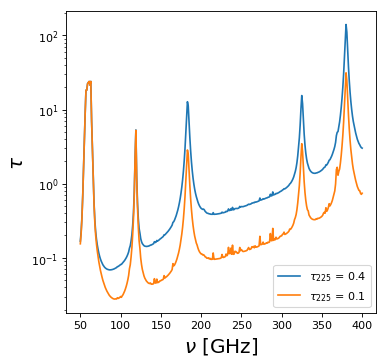

In [9]:
atm.set_tau_225(tau_225 = 0.4)
fig1 = plt.figure(1, (5,5), 80)
ax = plt.subplot()
ax.set_yscale("log", nonposy='clip')
plt.plot(atm.nu(u.GHz), atm.opacity(), label=r'$\tau_{{225}}$ = {}'.format(atm.tau_225))
# set a new tau on the fly
plt.plot(atm.nu(u.GHz), atm.opacity(tau_225=0.1), label=r'$\tau_{{225}}$ = {}'.format(atm.tau_225))
plt.xlabel(r'$\nu$ [GHz]', fontsize=18)
plt.ylabel(r'$\tau$', fontsize=18)
plt.legend(loc='lower right')
print(atm)



We have now everything in hand to compute the transmission of the atmosphere at a given elevation. Given the airmass:

$sec z = \frac{1}{\sin el} $

$T_{\nu} = \exp(-sec z \times \tau_{\nu}) $

For example at 40 degree elevation:


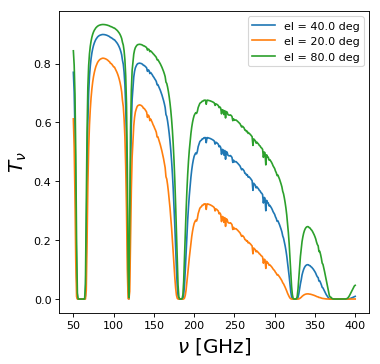

In [10]:
atm.set_tau_225(tau_225 = 0.4)
fig1 = plt.figure(1, (5,5), 80)
plt.plot(atm.nu(u.GHz), atm.transmission(Angle(40 * u.deg)), label=r'el = {}'.format(Angle(40 * u.deg)))
plt.plot(atm.nu(u.GHz), atm.transmission(Angle(20 * u.deg)), label=r'el = {}'.format(Angle(20 * u.deg)))
plt.plot(atm.nu(u.GHz), atm.transmission(Angle(80 * u.deg)), label=r'el = {}'.format(Angle(80 * u.deg)))
plt.xlabel(r'$\nu$ [GHz]', fontsize=18)
plt.ylabel(r'$T_{\nu}$', fontsize=18)
plt.legend(loc='upper right')






We remark that the atmospheroc transmission is far from constant in the 1mm and 2mm windows. How will this affect the overall system transmission ? Photometry provides a class where the passband and atmosphere transmissions are combined: IramPassband

## IramPassband: Combine Atmosphere and Passband

If you are unfamiliar with the Passband class, I suggest you first consult the documentation for it.

We will create 3 NIKA2 IramPassband and 3 NIKA2 Passbands. 

In [11]:
# The normal passbands
n1mmV = pt.Passband(file='1mmV.NIKA2.pb')
n1mmH = pt.Passband(file='1mmH.NIKA2.pb')
n2mm = pt.Passband(file='2mm.NIKA2.pb')

# The atmosphere + passbands
a1mmV = pt.IramPassband(file='1mmV.NIKA2.pb')
a1mmH = pt.IramPassband(file='1mmH.NIKA2.pb')
a2mm = pt.IramPassband(file='2mm.NIKA2.pb')

# Lets also load some planet spectrum. See the planet_fluxes notebook for details
uranus = pt.GiantPlanet('Uranus')
uranus.set_dates(Time('2017-04-24T00:00:00.0'))
uranus_spectrum = uranus.spectral_irradiance()

Snu_uranus_1mmH_noatm = n1mmH.fnu_ab(uranus_spectrum)
Snu_uranus_1mmV_noatm = n1mmV.fnu_ab(uranus_spectrum)
Snu_uranus_2mm_noatm = n2mm.fnu_ab(uranus_spectrum)

print("uranus no atmosphere, 1mmH = {:.2f}, 1mmV = {:.2f}, 2mm = {:.2f}".\
      format(Snu_uranus_1mmH_noatm.to(u.Jy) , Snu_uranus_1mmV_noatm.to(u.Jy), Snu_uranus_2mm_noatm.to(u.Jy)))

try:
   Snu_uranus_1mmH_atm = a1mmH.fnu_ab(uranus_spectrum) 
except:
   print("can't compute yet..")

uranus no atmosphere, 1mmH = 36.78 Jy, 1mmV = 37.42 Jy, 2mm = 15.01 Jy


In [13]:
# In order to be able to compute, one must set up the atmosphere conditions of the IramPassband
# just like we do for the atmosphere. 
a2mm.select_grid(temperature=276 * u.K, pressure=723 * u.hPa)
a2mm.set_tau_225(tau_225=0.4)

a1mmH.select_grid(temperature=276 * u.K, pressure=723 * u.hPa)
a1mmH.set_tau_225(tau_225=0.4)

a1mmV.select_grid(temperature=276 * u.K, pressure=723 * u.hPa)
a1mmV.set_tau_225(tau_225=0.4)

print(a2mm)

**** Atmosphere: 
Model:               2009
Observatory:         iram30m
Profile:             midlatwinter
File:                2mm.NIKA2.pb
Grid set:            True
Current temperature: 276.0 K
Model temperature:   274.4444580078125 K
Current pressure:    723.0 hPa
Model pressure:      719.1987915039062 hPa
Tau set:             True
Tau 225 GHz:         0.4
mm H2O:              7.500673501353317 mm
Ready to compute     True
**** Passband: 
############### Header #################
# comment: Data acquired at I. Neel, Grenoble with a Martin-Puplett Interferometer
# comment: obtained in 2015
# comment: NIKA2 initial configuration before going to the 30m telescope
# comment: reduced v1 2015/10/14
# comment: by A.Monfardini, A. F.X. Desert
# comment: NIKA2 transmission is measured with a Rayleigh-Jeans spectrum in input
# comment: which is thus consistent with Planets
# comment: Hence, colour corrections have to be computed
# comment: Updated transmission in Jan 2017, after the change of 

In [14]:
# We see that both atmosphere and passband are  OK, but that irampassband still misses an 
# elevation. Let's do it:

a2mm.set_elevation(Angle(40. * u.deg))
a1mmH.set_elevation(Angle(40. * u.deg))
a1mmV.set_elevation(Angle(40. * u.deg))
print(a2mm)

**** Atmosphere: 
Model:               2009
Observatory:         iram30m
Profile:             midlatwinter
File:                2mm.NIKA2.pb
Grid set:            True
Current temperature: 276.0 K
Model temperature:   274.4444580078125 K
Current pressure:    723.0 hPa
Model pressure:      719.1987915039062 hPa
Tau set:             True
Tau 225 GHz:         0.4
mm H2O:              7.500673501353317 mm
Ready to compute     True
**** Passband: 
############### Header #################
# comment: Data acquired at I. Neel, Grenoble with a Martin-Puplett Interferometer
# comment: obtained in 2015
# comment: NIKA2 initial configuration before going to the 30m telescope
# comment: reduced v1 2015/10/14
# comment: by A.Monfardini, A. F.X. Desert
# comment: NIKA2 transmission is measured with a Rayleigh-Jeans spectrum in input
# comment: which is thus consistent with Planets
# comment: Hence, colour corrections have to be computed
# comment: Updated transmission in Jan 2017, after the change of 

In [15]:
# We are good to go !

Snu_uranus_1mmH_0p4_40 = a1mmH.fnu_ab(uranus_spectrum)
Snu_uranus_1mmV_0p4_40 = a1mmV.fnu_ab(uranus_spectrum)
Snu_uranus_2mm_0p4_40 = a2mm.fnu_ab(uranus_spectrum)

print("uranus no atmosphere, 1mmH = {:.2f}, 1mmV = {:.2f}, 2mm = {:.2f}".\
      format(Snu_uranus_1mmH_noatm.to(u.Jy) , Snu_uranus_1mmV_noatm.to(u.Jy), Snu_uranus_2mm_noatm.to(u.Jy)))

print("uranus with atm, tau_225=0.4, 40 deg, 1mmH = {:.2f}, 1mmV = {:.2f}, 2mm = {:.2f}".\
      format(Snu_uranus_1mmH_0p4_40.to(u.Jy) , Snu_uranus_1mmV_0p4_40.to(u.Jy), Snu_uranus_2mm_0p4_40.to(u.Jy)))





uranus no atmosphere, 1mmH = 36.78 Jy, 1mmV = 37.42 Jy, 2mm = 15.01 Jy
uranus with atm, tau_225=0.4, 40 deg, 1mmH = 36.24 Jy, 1mmV = 36.84 Jy, 2mm = 14.67 Jy


In [20]:
# That's a significant change ! Let's check at zenith
a2mm.set_elevation(Angle(90. * u.deg))
a1mmH.set_elevation(Angle(90. * u.deg))
a1mmV.set_elevation(Angle(90. * u.deg))

Snu_uranus_1mmH_0p4_90 = a1mmH.fnu_ab(uranus_spectrum)
Snu_uranus_1mmV_0p4_90 = a1mmV.fnu_ab(uranus_spectrum)
Snu_uranus_2mm_0p4_90 = a2mm.fnu_ab(uranus_spectrum)

print("uranus with atm, tau_225=0.4, 90 deg, 1mmH = {:.2f}, 1mmV = {:.2f}, 2mm = {:.2f}".\
      format(Snu_uranus_1mmH_0p4_40.to(u.Jy) , Snu_uranus_1mmV_0p4_40.to(u.Jy), Snu_uranus_2mm_0p4_40.to(u.Jy)))
print("relative difference: 1mmH = {:.2f}%, 1mmV = {:.2f}%, 2mm = {:.2f}%".\
      format((Snu_uranus_1mmH_0p4_90-Snu_uranus_1mmH_noatm)/Snu_uranus_1mmH_noatm*100, \
             (Snu_uranus_1mmV_0p4_90-Snu_uranus_1mmV_noatm)/Snu_uranus_1mmV_noatm*100, \
             (Snu_uranus_2mm_0p4_90-Snu_uranus_2mm_noatm)/Snu_uranus_2mm_noatm*100))


uranus with atm, tau_225=0.4, 90 deg, 1mmH = 36.24 Jy, 1mmV = 36.84 Jy, 2mm = 14.67 Jy
relative difference: 1mmH = -0.96%, 1mmV = -1.00%, 2mm = -1.65%


In [28]:
# This depends on the tau 225 au course:
a2mm.set_tau_225(tau_225=0.1)
a1mmH.set_tau_225(tau_225=0.1)
a1mmV.set_tau_225(tau_225=0.1)

Snu_uranus_1mmH_0p1_90 = a1mmH.fnu_ab(uranus_spectrum)
Snu_uranus_1mmV_0p1_90 = a1mmV.fnu_ab(uranus_spectrum)
Snu_uranus_2mm_0p1_90 = a2mm.fnu_ab(uranus_spectrum)

print("uranus with atm, tau_225=0.1, 90 deg, 1mmH = {:.2f}, 1mmV = {:.2f}, 2mm = {:.2f}".\
      format(Snu_uranus_1mmH_0p1_90.to(u.Jy) , Snu_uranus_1mmV_0p1_90.to(u.Jy), Snu_uranus_2mm_0p1_90.to(u.Jy)))
print("relative difference: 1mmH = {:.2f}%, 1mmV = {:.2f}%, 2mm = {:.2f}%".\
      format((Snu_uranus_1mmH_0p1_90-Snu_uranus_1mmH_noatm)/Snu_uranus_1mmH_noatm*100, \
             (Snu_uranus_1mmV_0p1_90-Snu_uranus_1mmV_noatm)/Snu_uranus_1mmV_noatm*100, \
             (Snu_uranus_2mm_0p1_90-Snu_uranus_2mm_noatm)/Snu_uranus_2mm_noatm*100))




uranus with atm, tau_225=0.1, 90 deg, 1mmH = 36.69 Jy, 1mmV = 37.33 Jy, 2mm = 14.97 Jy
relative difference: 1mmH = -0.24%, 1mmV = -0.25%, 2mm = -0.31%


In [29]:
# This depends on the tau 225 au course:
a2mm.set_tau_225(tau_225=1.0)
a1mmH.set_tau_225(tau_225=1.0)
a1mmV.set_tau_225(tau_225=1.0)

Snu_uranus_1mmH_1p0_90 = a1mmH.fnu_ab(uranus_spectrum)
Snu_uranus_1mmV_1p0_90 = a1mmV.fnu_ab(uranus_spectrum)
Snu_uranus_2mm_1p0_90 = a2mm.fnu_ab(uranus_spectrum)

print("uranus with atm, tau_225=0.1, 90 deg, 1mmH = {:.2f}, 1mmV = {:.2f}, 2mm = {:.2f}".\
      format(Snu_uranus_1mmH_1p0_90.to(u.Jy) , Snu_uranus_1mmV_1p0_90.to(u.Jy), Snu_uranus_2mm_1p0_90.to(u.Jy)))
print("relative difference: 1mmH = {:.2f}%, 1mmV = {:.2f}%, 2mm = {:.2f}%".\
      format((Snu_uranus_1mmH_1p0_90-Snu_uranus_1mmH_noatm)/Snu_uranus_1mmH_noatm*100, \
             (Snu_uranus_1mmV_1p0_90-Snu_uranus_1mmV_noatm)/Snu_uranus_1mmV_noatm*100, \
             (Snu_uranus_2mm_1p0_90-Snu_uranus_2mm_noatm)/Snu_uranus_2mm_noatm*100))





uranus with atm, tau_225=0.1, 90 deg, 1mmH = 35.91 Jy, 1mmV = 36.50 Jy, 2mm = 14.49 Jy
relative difference: 1mmH = -2.36%, 1mmV = -2.47%, 2mm = -3.49%


These changes are due to the fact that the atmosphere change the shape of the filter. Lets plot this so we can see 

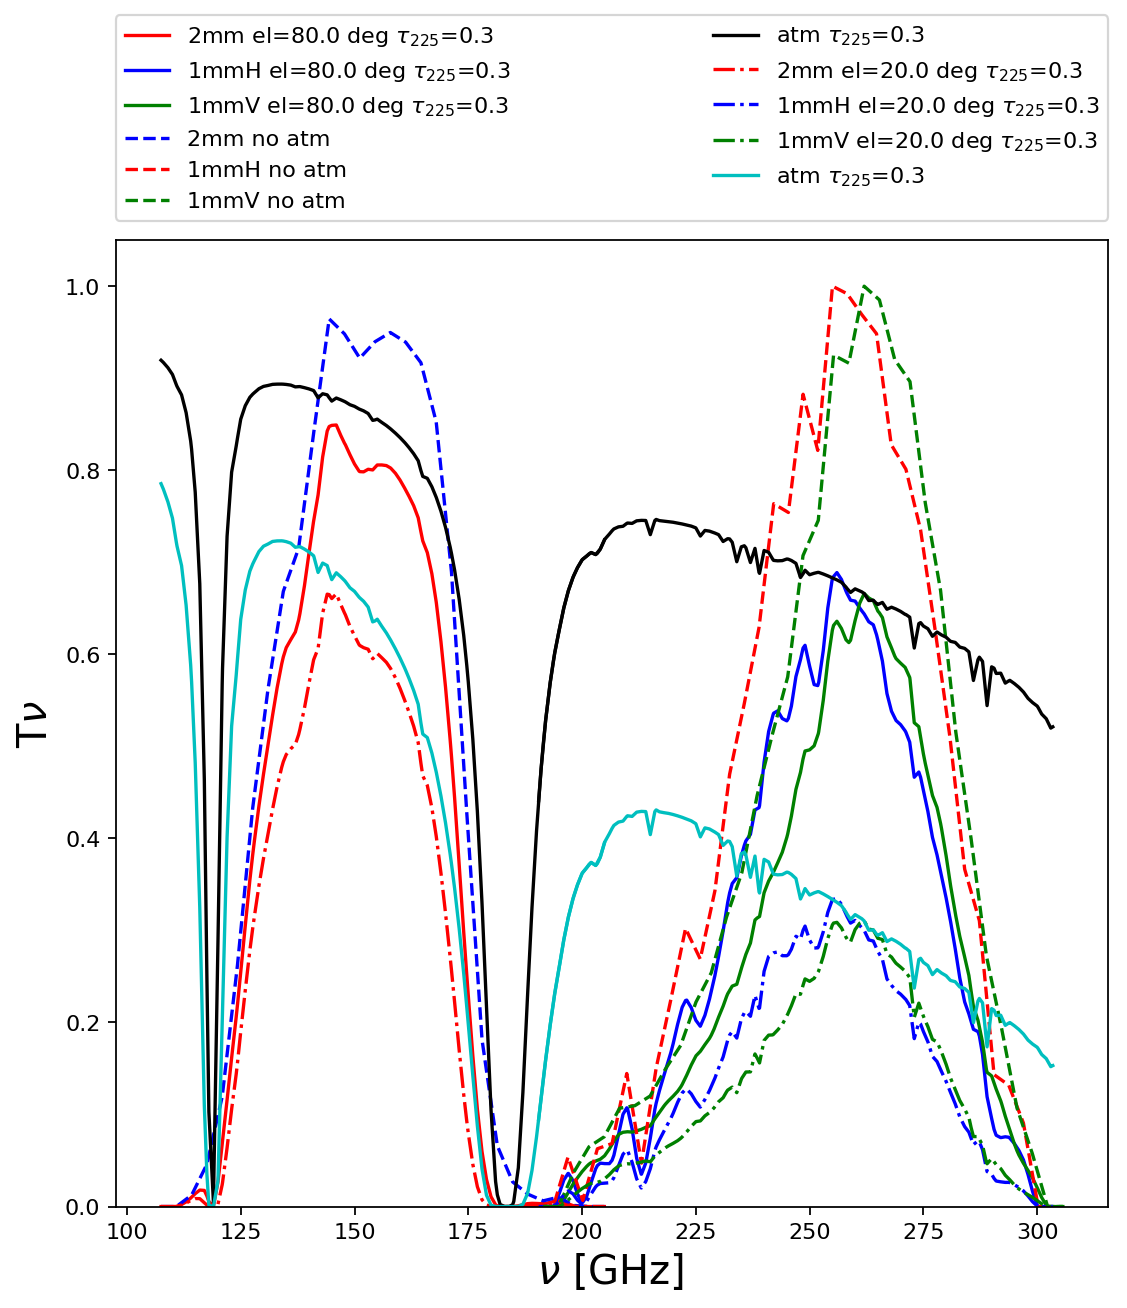

In [44]:
tau1 = 0.3
elevation1 = Angle(80. * u.deg)
tau2 = 0.3
elevation2 = Angle(20. * u.deg)

a2mm.set_tau_225(tau_225=tau1)
a1mmH.set_tau_225(tau_225=tau1)
a1mmV.set_tau_225(tau_225=tau1)

a2mm.set_elevation(elevation1)
a1mmH.set_elevation(elevation1)
a1mmV.set_elevation(elevation1)



fig = plt.figure(1, (8,8), 160)

plt.plot(a2mm.nu(u.GHz), a2mm.response(), 'r', \
          label=r'2mm el={} $\tau_{{225}}$={}'.format(a2mm.elevation, a2mm.tau_225))
plt.plot(a1mmH.nu(u.GHz), a1mmH.response(), 'b-',\
          label=r'1mmH el={} $\tau_{{225}}$={}'.format(a1mmH.elevation, a1mmH.tau_225))
plt.plot(a1mmV.nu(u.GHz), a1mmV.response(), 'g-',\
          label=r'1mmV el={} $\tau_{{225}}$={}'.format(a1mmV.elevation, a1mmV.tau_225))
plt.plot(n2mm.nu(u.GHz), n2mm.response(), 'b--', label='2mm no atm')
plt.plot(n1mmH.nu(u.GHz), n1mmH.response(), 'r--', label='1mmH no atm')
plt.plot(n1mmV.nu(u.GHz), n1mmV.response(), 'g--', label='1mmV no atm')
plt.plot(a2mm.nu(u.GHz), a2mm.atm_trans, 'k-' , label=r'atm $\tau_{{225}}$={}'.format(a2mm.tau_225))
plt.plot(a1mmH.nu(u.GHz), a1mmH.atm_trans, 'k-')



a2mm.set_tau_225(tau_225=tau2)
a1mmH.set_tau_225(tau_225=tau2)
a1mmV.set_tau_225(tau_225=tau2)

a2mm.set_elevation(elevation2)
a1mmH.set_elevation(elevation2)
a1mmV.set_elevation(elevation2)

plt.plot(a2mm.nu(u.GHz), a2mm.response(), 'r-.',  \
          label=r'2mm el={} $\tau_{{225}}$={}'.format(a2mm.elevation, a2mm.tau_225))
plt.plot(a1mmH.nu(u.GHz), a1mmH.response(),'b-.', \
          label=r'1mmH el={} $\tau_{{225}}$={}'.format(a1mmH.elevation, a1mmH.tau_225))
plt.plot(a1mmV.nu(u.GHz), a1mmV.response(),'g-.', \
          label=r'1mmV el={} $\tau_{{225}}$={}'.format(a1mmV.elevation, a1mmV.tau_225))
plt.plot(a2mm.nu(u.GHz), a2mm.atm_trans , 'c-',label=r'atm $\tau_{{225}}$={}'.format(a2mm.tau_225))
plt.plot(a1mmH.nu(u.GHz), a1mmH.atm_trans, 'c-' )

plt.ylim(0., 1.05)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.xlabel(r'$\nu$ [GHz] ', fontsize=18)
plt.ylabel(r'T$\nu$', fontsize=18)




## Atmosphere emission

We have seen 

In [16]:
uranus = pt.GiantPlanet('Uranus')
neptune = pt.GiantPlanet('Neptune')
neptune.set_dates(Time('2017-04-20T00:00:00.0'))
uranus.set_dates(Time('2017-04-20T00:00:00.0'))
spec_uranus = uranus.spectral_irradiance()
spec_neptune = neptune.spectral_irradiance()

T2mm.set_tau_225(tau_225=0.2)
T1mmH.set_tau_225(tau_225=0.2)
T1mmV.set_tau_225(tau_225=0.2)

f_u_2mm_0p2=T2mm.fnu_ab(spec_uranus)
f_u_1mmH_0p2=T1mmH.fnu_ab(spec_uranus)
f_u_1mmV_0p2=T1mmV.fnu_ab(spec_uranus)

T2mm.set_tau_225(tau_225=0.1)
T1mmH.set_tau_225(tau_225=0.1)
T1mmV.set_tau_225(tau_225=0.1)

f_u_2mm_0p1=T2mm.fnu_ab(spec_uranus)
f_u_1mmH_0p1=T1mmH.fnu_ab(spec_uranus)
f_u_1mmV_0p1=T1mmV.fnu_ab(spec_uranus)

T2mm.set_tau_225(tau_225=0.5)
T1mmH.set_tau_225(tau_225=0.5)
T1mmV.set_tau_225(tau_225=0.5)

f_u_2mm_0p5=T2mm.fnu_ab(spec_uranus)
f_u_1mmH_0p5=T1mmH.fnu_ab(spec_uranus)
f_u_1mmV_0p5=T1mmV.fnu_ab(spec_uranus)

print("1mmV/2mm at 0.2 = {}".format(f_u_1mmV_0p2/f_u_2mm_0p2))
print("1mmH/2mm at 0.2 = {}".format(f_u_1mmH_0p2/f_u_2mm_0p2))

print("1mmV/2mm at 0.5 = {}".format(f_u_1mmV_0p5/f_u_2mm_0p5))
print("1mmH/2mm at 0.5 = {}".format(f_u_1mmH_0p5/f_u_2mm_0p5))

print("1mmV/2mm at 0.1 = {}".format(f_u_1mmV_0p1/f_u_2mm_0p1))
print("1mmH/2mm at 0.1 = {}".format(f_u_1mmH_0p1/f_u_2mm_0p1))





1mmV/2mm at 0.2 = 2.503412042750928
1mmH/2mm at 0.2 = 2.46220434783977
1mmV/2mm at 0.5 = 2.5090176761166902
1mmH/2mm at 0.5 = 2.470875029880375
1mmV/2mm at 0.1 = 2.494559284628718
1mmH/2mm at 0.1 = 2.4527662594208066


In [26]:
print(((f_u_1mmV_0p5/f_u_2mm_0p5) - (f_u_1mmV_0p1/f_u_2mm_0p1))/(f_u_1mmV_0p5/f_u_2mm_0p5))
print(((f_u_1mmH_0p5/f_u_2mm_0p5) - (f_u_1mmH_0p1/f_u_2mm_0p1))/(f_u_1mmH_0p5/f_u_2mm_0p5))

0.007527874797439076
0.008176465827656099
